The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [11]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Start coding here!

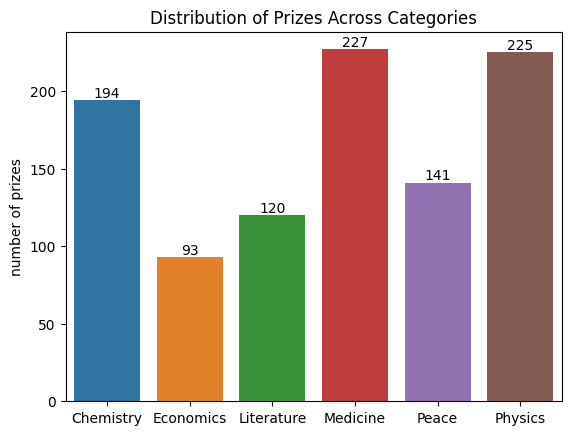

In [41]:
df = pd.read_csv('./data/nobel.csv')
cat_list = list(df['category'].unique())
data_cat = df.groupby('category')['prize'].count().reset_index()
ax = sns.barplot(data =data_cat , x = 'category', y = 'prize', hue = 'category', legend = False )
for value in ax.containers:
    ax.bar_label(value)

plt.xlabel('')
plt.ylabel('number of prizes')
plt.title('Distribution of Prizes Across Categories')
plt.show()

In [24]:
df['laureate_type'].value_counts()

laureate_type
Individual      966
Organization     34
Name: count, dtype: int64

##### What is the most commonly awarded gender and birth country?
***Store your answers as string variables top_gender and top_country.***
##### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
***Store this as an integer called max_decade_usa.***
##### Which decade and Nobel Prize category combination had the highest proportion of female laureates?
***Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.***
##### Who was the first woman to receive a Nobel Prize, and in what category?
***Save your string answers as first_woman_name and first_woman_category. ***
##### Which individuals or organizations have won more than one Nobel Prize throughout the years?
***Store the full names in a list named repeat_list.***
